In [ ]:
import gdown
import zipfile
import os
import torch
import json
import random
import textwrap
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, AutoencoderKL, UNet2DConditionModel
from transformers import CLIPTextModel, CLIPTokenizer

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [ ]:
file_id = '1oSuEOE3DynxTh1XRTmWb1Pybg4hSpVAG'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.zip'

In [ ]:
if not os.path.exists('dataset'):
    print("Downloading dataset...")
    gdown.download(url, output, quiet=False)

    # Create directory and unzip
    os.makedirs('dataset', exist_ok=True)
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    print("Download and extraction complete.")
else:
    print("Dataset already exists.")

Downloading...
From (original): https://drive.google.com/uc?id=1oSuEOE3DynxTh1XRTmWb1Pybg4hSpVAG
From (redirected): https://drive.google.com/uc?id=1oSuEOE3DynxTh1XRTmWb1Pybg4hSpVAG&confirm=t&uuid=d4ac7785-1b0a-4205-972e-0891010d9de2
To: /content/dataset.zip
100%|██████████| 419M/419M [00:04<00:00, 101MB/s] 


Download and extraction complete.


In [ ]:
# --- CONFIGURATION ---
# UPDATE THIS PATH to where your checkpoints are stored (e.g. "/content/drive/MyDrive/ControlNet_Output")
CHECKPOINT_DIR = "/content/drive/MyDrive/ControlNet_V1/checkpoints"

# Dataset Config
ROOT_DIR = "/content/dataset"
JSON_FILE = os.path.join(ROOT_DIR, "train.jsonl")

# Model Config
BASE_MODEL = "stablediffusionapi/anything-v3"
DEVICE = "cuda"

In [ ]:
def get_test_sample(index=0):
    try:
        with open(JSON_FILE, 'r') as f:
            lines = [line for line in f if line.strip()]
            item = json.loads(lines[index]) # Use fixed index for consistency

            sketch_path = os.path.join(ROOT_DIR, item['conditioning_image'])
            prompt = item['text']

            sketch = Image.open(sketch_path).convert("RGB").resize((512, 512))
            return sketch, prompt
    except Exception as e:
        print(f"Error loading sample: {e}")
        return None, None

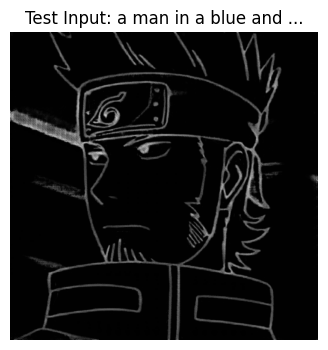

In [ ]:
test_sketch, test_prompt = get_test_sample(index=5)
if test_sketch:
    plt.figure(figsize=(4,4))
    plt.imshow(test_sketch)
    plt.title(f"Test Input: {test_prompt[:20]}...")
    plt.axis('off')
    plt.show()

In [ ]:
print("Loading Base Static Models...")
tokenizer = CLIPTokenizer.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="text_encoder", torch_dtype=torch.float16).to(DEVICE)
vae = AutoencoderKL.from_pretrained(BASE_MODEL, subfolder="vae", torch_dtype=torch.float16).to(DEVICE)
unet = UNet2DConditionModel.from_pretrained(BASE_MODEL, subfolder="unet", torch_dtype=torch.float16).to(DEVICE)
print("Base models loaded.")

Loading Base Static Models...


tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Base models loaded.


🧪 Starting Experiment 1: Epochs [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
   Generating epoch 10...


model_index.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 20...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 30...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 40...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 50...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 60...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 70...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 80...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 90...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Generating epoch 100...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

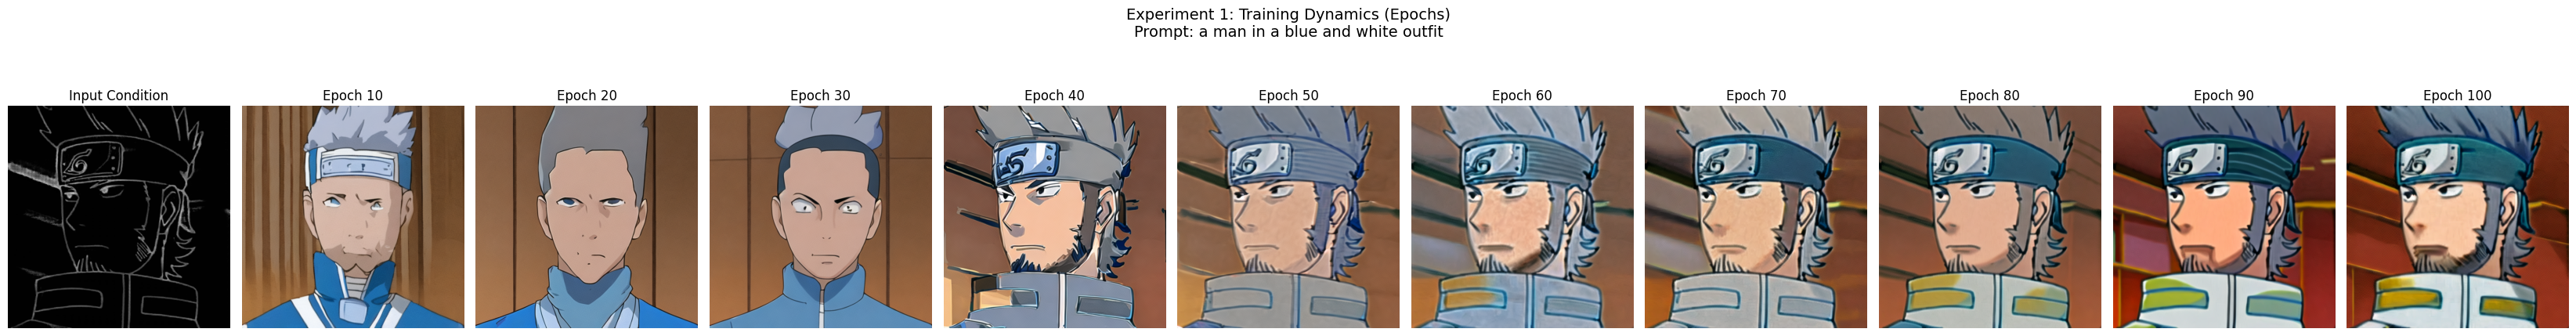

In [ ]:
# --- EXPERIMENT 1: EPOCH PROGRESSION (10, 20, ... 100) ---
epochs_to_test = list(range(10, 101, 10)) # [10, 20, ..., 100]

# Setup Plot
num_cols = len(epochs_to_test) + 1
fig, axs = plt.subplots(1, num_cols, figsize=(3 * num_cols, 5))

# Plot Input
axs[0].imshow(test_sketch)
axs[0].set_title("Input Condition")
axs[0].axis("off")

print(f"🧪 Starting Experiment 1: Epochs {epochs_to_test}")

for i, epoch in enumerate(epochs_to_test):
    ckpt_path = os.path.join(CHECKPOINT_DIR, f"checkpoint-epoch-{epoch}")

    if os.path.exists(ckpt_path):
        print(f"   Generating epoch {epoch}...")

        # 1. Load Specific ControlNet Checkpoint
        controlnet = ControlNetModel.from_pretrained(ckpt_path, torch_dtype=torch.float16).to(DEVICE)

        # 2. Build Pipeline
        pipe = StableDiffusionControlNetPipeline.from_pretrained(
            BASE_MODEL, controlnet=controlnet, vae=vae, text_encoder=text_encoder,
            tokenizer=tokenizer, unet=unet, safety_checker=None, torch_dtype=torch.float16
        ).to(DEVICE)
        pipe.set_progress_bar_config(disable=True)

        # 3. Generate
        # Using a fixed seed for strict scientific comparison
        generator = torch.Generator(device=DEVICE).manual_seed(42)
        image = pipe(test_prompt, image=test_sketch, num_inference_steps=30, generator=generator).images[0]

        # 4. Plot
        axs[i+1].imshow(image)
        axs[i+1].set_title(f"Epoch {epoch}")
        axs[i+1].axis("off")

        # 5. Cleanup to save VRAM
        del controlnet, pipe
        torch.cuda.empty_cache()
    else:
        print(f"Checkpoint for Epoch {epoch} not found at {ckpt_path}")
        axs[i+1].text(0.5, 0.5, f"Missing\nEpoch {epoch}", ha='center')
        axs[i+1].axis("off")

plt.suptitle(f"Experiment 1: Training Dynamics (Epochs)\nPrompt: {test_prompt}", fontsize=14)
plt.tight_layout()
plt.show()

Starting Experiment 2: Conditioning Scales on Epoch 60


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Testing scale 0.0...
   Testing scale 0.5...
   Testing scale 0.6...
   Testing scale 0.7...
   Testing scale 1.0...
   Testing scale 1.5...
   Testing scale 2.0...


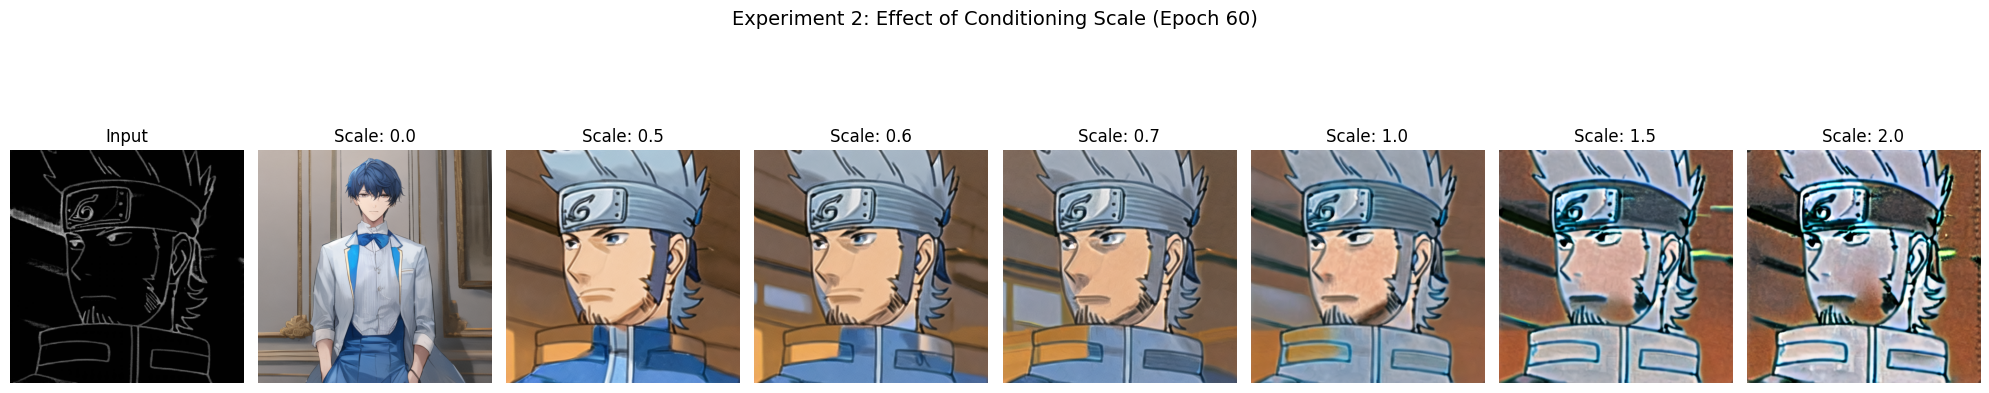

In [ ]:
# --- EXPERIMENT 2: CONDITIONING SCALE ---
BEST_EPOCH = 60  # Use your best checkpoint here
scales_to_test = [0.0, 0.5, 0.6, 0.7, 1.0, 1.5, 2.0]

ckpt_path = os.path.join(CHECKPOINT_DIR, f"checkpoint-epoch-{BEST_EPOCH}")

if os.path.exists(ckpt_path):
    print(f"Starting Experiment 2: Conditioning Scales on Epoch {BEST_EPOCH}")

    # Load Model ONCE for this experiment
    controlnet = ControlNetModel.from_pretrained(ckpt_path, torch_dtype=torch.float16).to(DEVICE)
    pipe = StableDiffusionControlNetPipeline.from_pretrained(
        BASE_MODEL, controlnet=controlnet, vae=vae, text_encoder=text_encoder,
        tokenizer=tokenizer, unet=unet, safety_checker=None, torch_dtype=torch.float16
    ).to(DEVICE)
    pipe.set_progress_bar_config(disable=True)

    # Plot setup
    fig, axs = plt.subplots(1, len(scales_to_test) + 1, figsize=(20, 5))
    axs[0].imshow(test_sketch)
    axs[0].set_title("Input")
    axs[0].axis("off")

    for i, scale in enumerate(scales_to_test):
        print(f"   Testing scale {scale}...")
        generator = torch.Generator(device=DEVICE).manual_seed(42)

        # Note: controlnet_conditioning_scale argument
        image = pipe(
            test_prompt,
            image=test_sketch,
            controlnet_conditioning_scale=scale,
            num_inference_steps=30,
            generator=generator
        ).images[0]

        axs[i+1].imshow(image)
        axs[i+1].set_title(f"Scale: {scale}")
        axs[i+1].axis("off")

    plt.suptitle(f"Experiment 2: Effect of Conditioning Scale (Epoch {BEST_EPOCH})", fontsize=14)
    plt.tight_layout()
    plt.show()

    del controlnet, pipe
    torch.cuda.empty_cache()
else:
    print(f"Checkpoint {BEST_EPOCH} not found.")

🧪 Starting Experiment 3: Prompt vs No Prompt


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

   Testing Full Prompt...
   Testing No Prompt...


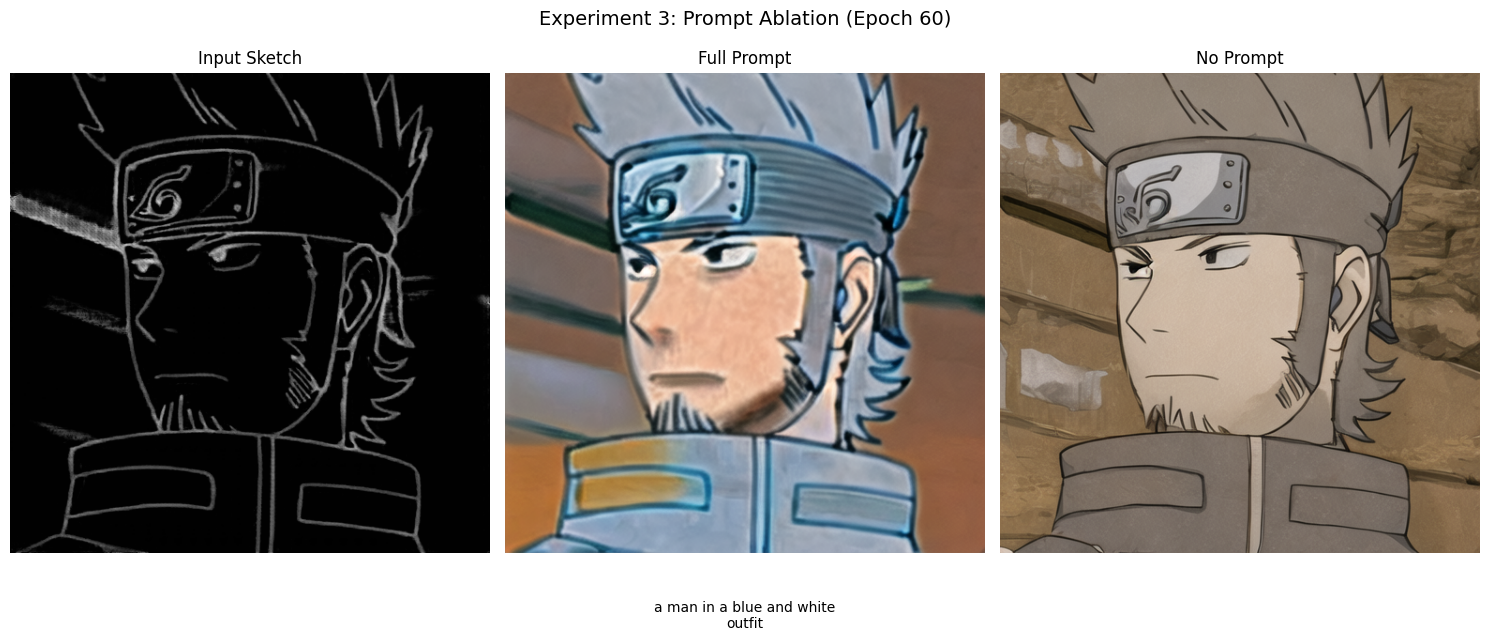

In [ ]:
# --- EXPERIMENT 3: TEXT PROMPT ABLATION ---
BEST_EPOCH = 60

ckpt_path = os.path.join(CHECKPOINT_DIR, f"checkpoint-epoch-{BEST_EPOCH}")

if os.path.exists(ckpt_path):
    print(f"🧪 Starting Experiment 3: Prompt vs No Prompt")

    controlnet = ControlNetModel.from_pretrained(ckpt_path, torch_dtype=torch.float16).to(DEVICE)
    pipe = StableDiffusionControlNetPipeline.from_pretrained(
        BASE_MODEL, controlnet=controlnet, vae=vae, text_encoder=text_encoder,
        tokenizer=tokenizer, unet=unet, safety_checker=None, torch_dtype=torch.float16
    ).to(DEVICE)
    pipe.set_progress_bar_config(disable=True)

    conditions = [
        ("Full Prompt", test_prompt),
        ("No Prompt", "") # Empty string
    ]

    fig, axs = plt.subplots(1, 3, figsize=(15, 6))

    # Input
    axs[0].imshow(test_sketch)
    axs[0].set_title("Input Sketch")
    axs[0].axis("off")

    for i, (label, prompt_text) in enumerate(conditions):
        print(f"   Testing {label}...")
        generator = torch.Generator(device=DEVICE).manual_seed(42)

        image = pipe(
            prompt_text,
            image=test_sketch,
            num_inference_steps=30,
            generator=generator
        ).images[0]

        axs[i+1].imshow(image)
        axs[i+1].set_title(label)
        axs[i+1].axis("off")

        # Add text wrap for the prompt if it exists
        if prompt_text:
            wrapper = textwrap.TextWrapper(width=30)
            wrapped_text = "\n".join(wrapper.wrap(prompt_text))
            axs[i+1].text(0.5, -0.1, wrapped_text, ha='center', va='top', transform=axs[i+1].transAxes)

    plt.suptitle(f"Experiment 3: Prompt Ablation (Epoch {BEST_EPOCH})", fontsize=14)
    plt.tight_layout()
    plt.show()

    del controlnet, pipe
    torch.cuda.empty_cache()

In [ ]:
!pip install -q lpips

In [ ]:
import torch
import lpips
import numpy as np
import json
import os
from PIL import Image
from tqdm import tqdm
from skimage.metrics import structural_similarity as ssim
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, AutoencoderKL, UNet2DConditionModel
from transformers import CLIPTextModel, CLIPTokenizer
from torchvision import transforms

JSON_FILE = os.path.join(ROOT_DIR, "test.jsonl")

BEST_EPOCH = 60
CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, f"checkpoint-epoch-{BEST_EPOCH}")
DEVICE = "cuda"


# LPIPS Setup (Perceptual)
loss_fn_lpips = lpips.LPIPS(net='vgg').to(DEVICE)
lpips_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# --- 2. LOAD MODEL ---
print(f"Loading Model from {CHECKPOINT_PATH}...")
if os.path.exists(CHECKPOINT_PATH):
    controlnet = ControlNetModel.from_pretrained(CHECKPOINT_PATH, torch_dtype=torch.float16).to(DEVICE)
    pipe = StableDiffusionControlNetPipeline.from_pretrained(
        BASE_MODEL, controlnet=controlnet, vae=vae, text_encoder=text_encoder,
        tokenizer=tokenizer, unet=unet, safety_checker=None, torch_dtype=torch.float16
    ).to(DEVICE)
    pipe.set_progress_bar_config(disable=True)
else:
    raise FileNotFoundError("Checkpoint not found! Check your path.")

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth
Loading Model from /content/drive/MyDrive/ControlNet_V1/checkpoints/checkpoint-epoch-60...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
from tqdm import tqdm

# --- LOAD DATA & RUN EVALUATION ---
print(f"Reading from: {JSON_FILE}")

with open(JSON_FILE, 'r') as f:
    lines = [line for line in f if line.strip()]

print(f"Starting Evaluation on {len(lines)} test samples...")

ssim_scores = []
lpips_scores = []

for i, line in enumerate(tqdm(lines, desc="Evaluating")):
    try:
        # Load Data
        item = json.loads(line)
        sketch_path = os.path.join(ROOT_DIR, item['conditioning_image'])
        target_path = os.path.join(ROOT_DIR, item['image'])
        prompt = item['text']

        # Open Images
        sketch = Image.open(sketch_path).convert("RGB").resize((512, 512))
        ground_truth = Image.open(target_path).convert("RGB").resize((512, 512))

        # Generate
        generator = torch.Generator(device=DEVICE).manual_seed(42)
        generated = pipe(prompt, image=sketch, num_inference_steps=30, generator=generator).images[0]

        # --- A. CALCULATE SSIM ---
        gt_np = np.array(ground_truth)
        gen_np = np.array(generated)

        score_ssim = ssim(gt_np, gen_np, channel_axis=2, data_range=255)
        ssim_scores.append(score_ssim)

        # --- B. CALCULATE LPIPS ---
        gt_tensor = lpips_transform(ground_truth).unsqueeze(0).to(DEVICE)
        gen_tensor = lpips_transform(generated).unsqueeze(0).to(DEVICE)

        with torch.no_grad():
            score_lpips = loss_fn_lpips(gt_tensor, gen_tensor).item()
            lpips_scores.append(score_lpips)

    except Exception as e:
        print(f"Error on sample {i}: {e}")

Reading from: /content/dataset/test.jsonl
Starting Evaluation on 100 test samples...


Evaluating: 100%|██████████| 100/100 [03:22<00:00,  2.02s/it]


In [ ]:
# --- FINAL RESULT ---
avg_ssim = np.mean(ssim_scores)
avg_lpips = np.mean(lpips_scores)

print("\n" + "="*40)
print("FINAL QUANTITATIVE RESULTS")
print("="*40)
print(f"Dataset: {JSON_FILE}")
print(f"Samples Evaluated: {len(ssim_scores)}")
print("-" * 40)
print(f"SSIM  (Structure): {avg_ssim:.4f}")
print(f"LPIPS (Perception): {avg_lpips:.4f}")
print("="*40)


FINAL QUANTITATIVE RESULTS
Dataset: /content/dataset/test.jsonl
Samples Evaluated: 100
----------------------------------------
SSIM  (Structure): 0.5549
LPIPS (Perception): 0.5762
